神经网络

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告

In [2]:
def load_data(path, transpose=True):
    data = sio.loadmat(path)
    y = data.get('y')
    y = y.reshape(y.shape[0])
    
    X = data.get('X')
    
    if transpose:
        # for this dataset, you need a transpose to get the orientation right
        X = np.array([im.reshape((20, 20)).T for im in X])
        # and I flat the image again to preserve the vector presentation
        X = np.array([im.reshape(400) for im in X])
    return X, y

In [12]:
X, y = load_data('ex3data1.mat')
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [14]:
def plot_an_image(image):
#     """
#     image : (400,)
#     """
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
#绘图函数

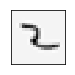

this should be 2


In [15]:
pick_one = np.random.randint(0, 5000)
plot_an_image(X[pick_one, :])
plt.show()
print('this should be {}'.format(y[pick_one]))

In [16]:
def plot_100_image(X):
    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """
    size = int(np.sqrt(X.shape[1]))
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    sample_images = X[sample_idx, :]
    
    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))
    
    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 *r + c].reshape((size, size)), cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            #绘图函数，画100张图片

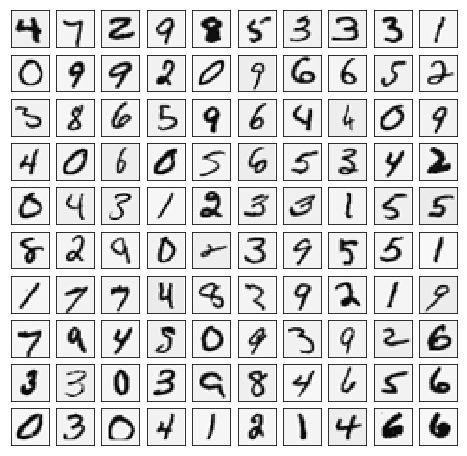

In [18]:
plot_100_image(X)
plt.show()

准备数据

In [19]:
raw_X, raw_y = load_data('ex3data1.mat')
print(raw_X.shape)
print(raw_y.shape)

(5000, 400)
(5000,)


In [23]:
# add intercept=1 for x0 添加一列
X = np.insert(raw_X, 0 , values=np.ones(raw_X.shape[0]), axis=1)#插入了第一列（全部为1）
X.shape

(5000, 401)

In [25]:
y_matrix = []

for k in range(1, 11):
    y_matrix.append((raw_y == k).astype(int))

y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)
y.shape

#  扩展 5000*1 到 5000*10
#     比如 y=10 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]: ndarray
#     """

(10, 5000)

In [26]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

train 1 model（训练一维模型）

In [27]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [28]:
def regularized_cost(theta, X, y, l=1):
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()
    return cost(theta, X, y) + regularized_term

In [29]:
def regularized_gradient(theta, X, y, l=1):
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n
    
    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    return gradient(theta, X, y) + regularized_term

In [30]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [35]:
def gradient(theta, X, y):
    '''just 1 batch gradient'''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta)- y)

In [40]:
def logistic_regression(X, y, l=1):
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(fun=regularized_cost,
                      x0=theta,
                      args=(X, y, l),
                      method='TNC',
                      jac=regularized_gradient,
                      options={'disp':True})
    final_theta = res.x
    return final_theta

In [41]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [42]:
t0 = logistic_regression(X, y[0])

In [43]:
print(t0.shape)
y_pred = predict(X, t0)
print('Accuracy={}'.format(np.mean(y[0] == y_pred)))

(401,)
Accuracy=0.9974


train k model（训练k维模型）

In [44]:
k_theta = np.array([logistic_regression(X, y[k]) for k in range(10)])
print(k_theta.shape)

(10, 401)


In [45]:
prob_matrix = sigmoid(X @ k_theta.T)

In [46]:
np.set_printoptions(suppress=True)
prob_matrix

array([[ 0.99577493,  0.        ,  0.00053479, ...,  0.0000647 ,
         0.00003913,  0.00172251],
       [ 0.99834718,  0.0000001 ,  0.00005606, ...,  0.00009687,
         0.0000029 ,  0.00008495],
       [ 0.99139784,  0.        ,  0.00056841, ...,  0.00000655,
         0.02648744,  0.00197472],
       ..., 
       [ 0.00000068,  0.04138765,  0.00321024, ...,  0.00012718,
         0.0029754 ,  0.70763552],
       [ 0.00001844,  0.00000013,  0.00000009, ...,  0.00164845,
         0.06829455,  0.86114402],
       [ 0.02880144,  0.        ,  0.0001297 , ...,  0.36611636,
         0.00498113,  0.14825941]])

In [48]:
y_pred = np.argmax(prob_matrix,axis=1)#返回沿轴axis最大值的索引，axis=1代表行
y_pred

array([0, 0, 0, ..., 9, 9, 7])

In [50]:
y_answer = raw_y.copy()
y_answer[y_answer==10] = 0

In [52]:
print(classification_report(y_answer, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       500
          1       0.95      0.99      0.97       500
          2       0.95      0.92      0.93       500
          3       0.95      0.91      0.93       500
          4       0.95      0.95      0.95       500
          5       0.92      0.92      0.92       500
          6       0.97      0.98      0.97       500
          7       0.95      0.95      0.95       500
          8       0.93      0.92      0.92       500
          9       0.92      0.92      0.92       500

avg / total       0.94      0.94      0.94      5000



In [56]:
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']

In [57]:
theta1, theta2 = load_weight('ex3weights.mat')
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [58]:
X, y = load_data('ex3data1.mat', transpose=False)
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
X.shape, y.shape

((5000, 401), (5000,))

In [59]:
a1 = X
z2 = a1 @ theta1.T
z2.shape

(5000, 25)

In [60]:
z2 = np.insert(z2, 0, values=np.ones(z2.shape[0]), axis=1)

In [61]:
a2 = sigmoid(z2)
a2.shape

(5000, 26)

In [62]:
z3 = a2 @ theta2.T
z3.shape

(5000, 10)

In [63]:
a3 = sigmoid(z3)
a3

array([[ 0.00013825,  0.0020554 ,  0.00304012, ...,  0.00049102,
         0.00774326,  0.99622946],
       [ 0.00058776,  0.00285027,  0.00414688, ...,  0.00292311,
         0.00235617,  0.99619667],
       [ 0.00010868,  0.0038266 ,  0.03058551, ...,  0.07514539,
         0.0065704 ,  0.93586278],
       ..., 
       [ 0.06278247,  0.00450406,  0.03545109, ...,  0.0026367 ,
         0.68944816,  0.00002744],
       [ 0.00101909,  0.00073436,  0.00037856, ...,  0.01456166,
         0.97598976,  0.00023337],
       [ 0.00005908,  0.00054172,  0.0000259 , ...,  0.00700508,
         0.73281465,  0.09166961]])

In [64]:
y_pred = np.argmax(a3, axis=1)
y_pred.shape

(5000,)

In [66]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00       500
          2       0.00      0.00      0.00       500
          3       0.00      0.00      0.00       500
          4       0.00      0.00      0.00       500
          5       0.01      0.01      0.01       500
          6       0.00      0.00      0.00       500
          7       0.00      0.00      0.00       500
          8       0.00      0.00      0.00       500
          9       0.01      0.01      0.01       500
         10       0.00      0.00      0.00       500

avg / total       0.00      0.00      0.00      5000



/home/hyj/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/hyj/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
